In [3]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from word2number import w2n
import scipy.stats as stats
import pylab
# import pandas as pd: This line imports the Pandas library and assigns it the alias pd.
# import numpy as np: This line imports the NumPy library and assigns it the alias np.
# from sklearn import linear_model: This line imports the linear_model module from the Scikit-Learn library, which provides various algorithms for linear regression and related tasks.
# import seaborn as sns: This line imports the Seaborn library, which provides functions for data visualization and statistical graphics.
# import matplotlib.pyplot as plt: This line imports the Pyplot module from the Matplotlib library, which provides functions for creating various types of plots and charts.
# %matplotlib inline: This is a Jupyter Notebook magic command that tells Jupyter to display Matplotlib plots inline within the notebook.
# from word2number import w2n: This line imports the w2n function from the Word2Number library, which can convert written numbers to numeric values (e.g. "one" to 1).
# import scipy.stats as stats: This line imports the stats module from the SciPy library, which provides various statistical functions and distributions.
# import pylab: This line imports the PyLab module from the Matplotlib library, which provides a MATLAB-like interface for creating plots and charts.

In [4]:
#Loading dataset in pandas dataframe
df=pd.read_csv('Social_Network_Ads.csv')

In [5]:
#Display first five rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
#Display Last five rows
df.tail

<bound method NDFrame.tail of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
# Displays information of whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
#Displays initial statistics 
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
# Return the count of Null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Implemeting Logistic Regression

In [10]:
#Correlation
df.corr()
# df.corr() computes the pairwise correlation coefficients between the User ID, Age, EstimatedSalary, and Purchased columns of the dataset. 
# The resulting correlation matrix shows that there is a moderate positive correlation between Age and Purchased (correlation coefficient of 0.622), 
# and a weak positive correlation between EstimatedSalary and Purchased (correlation coefficient of 0.362). The User ID column has no correlation
# with the other columns, as expected.

C:\Users\SKY_NET\AppData\Local\Temp\ipykernel_4200\2136002997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


Text(0.5, 1.0, 'Age vs Purchased')

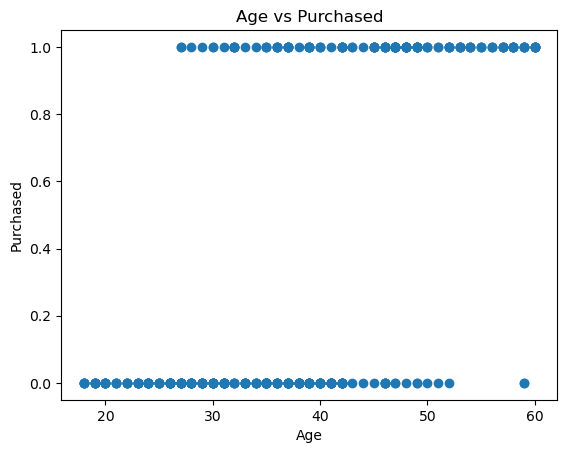

In [11]:
plt.scatter(df['Age'],df['Purchased'])
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Age vs Purchased')
# The resulting scatter plot shows that younger people (with lower ages) are less likely to purchase the product advertised in the dataset,
# while older people (with higher ages) are more likely to purchase the product.

In [12]:
# train_test_split is a function in the scikit-learn library that is used to split a dataset into training and testing sets.
from sklearn.model_selection import train_test_split

In [13]:
# In the code x=df[['Age']] and y=df['Purchased'], we are defining the independent variable x and the dependent variable y for our machine learning model.
x=df[['Age']]
y=df['Purchased']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# In the code x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2), we are using the train_test_split function to split the dataset into training 
# and testing sets. The x variable contains the independent variable Age, and the y variable contains the dependent variable Purchased.
# The test_size parameter is set to 0.2, which means that 20% of the dataset will be used for testing, and 80% of the dataset will be used for training. 
# The train_test_split function randomly shuffles the dataset before splitting it into training and testing sets, so the exact split will be different each time 
# the code is run.The function returns four variables: x_train, x_test, y_train, and y_test. The x_train and y_train variables contain the training data, and 
# the x_test and y_test variables contain the testing data. These variables are used to train and evaluate the performance of the logistic regression model.

In [15]:
# Creating an instance of the LogisticRegression class from the scikit-learn library.
clf=linear_model.LogisticRegression()

In [16]:
# fitting the logistic regression model to our training data. This trains the model on the independent variable x_train and the dependent variable y_train.
clf.fit(x_train,y_train)

LogisticRegression()

In [17]:
# using the trained logistic regression model to predict the values of the dependent variable y for the testing data x_test. 
# The predicted values are stored in the variable y_pred.
y_pred=clf.predict(x_test)

In [18]:
# Accessing the values of the dependent variable y for the testing data. This variable contains the actual 
# values of y that we want to compare with the predicted values y_pred.
y_test

131    0
36     0
217    0
32     0
380    0
      ..
49     0
352    1
163    0
1      0
106    0
Name: Purchased, Length: 80, dtype: int64

# Calculating Accuracy

In [19]:
# score() method of the logistic regression object, which returns the mean accuracy on the given test data and labels.
clf.score(x_test,y_test)*100

88.75

In [20]:
#Mean Squared error
print(np.mean((y_pred-y_test)**2))

0.1125


Text(0, 0.5, 'Predicted Values')

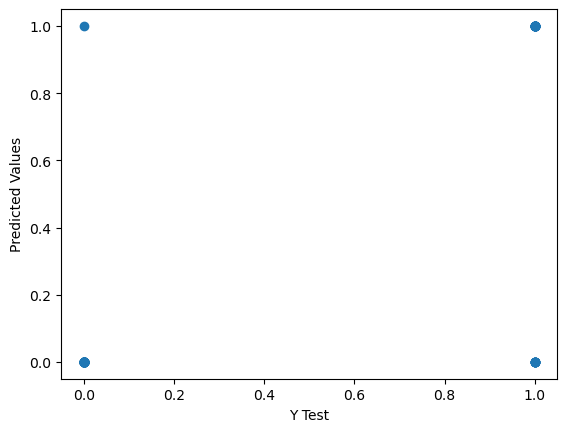

In [21]:
# Whether or not a user purchased a product based on their age.
#The four points located at the corners of the scatter plot may represent the extreme cases where the logistic function predicts either a very high or 
# very low probability of the binary outcome, and actual outcome is the opposite of the predicted probability. These cases may be due to outliers or anomalies in the data, 
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Values')

# Predictors as Age and EstimatedSalary

In [22]:
#With age and estimated salary
x1=df[['Age','EstimatedSalary']]
y1=df['Purchased']
# creates a new dataframe x1 that includes the predictor variables 'Age' and 'EstimatedSalary' from the original dataset df.
# creates a new dataframe y1 that includes the target variable 'Purchased' from the original dataset df.

In [23]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2)
# The train_test_split() function from the scikit-learn library to split the data into training and testing sets. 
# The predictor variables x1 and target variable y1 are used as input, along with the test_size parameter which specifies that the testing set should be 20% of the total dataset. 
# The resulting splits are assigned to the variables x_train1, x_test1, y_train1, and y_test1, which represent the training and testing data for both the predictor and target variables. 
# These splits can be used to train and evaluate machine learning models.

In [25]:
clf1=linear_model.LogisticRegression()
# its a logistic regression model to the training data using the scikit-learn LogisticRegression() function 
# and assigns the resulting model to the variable clf1.

In [25]:
clf1.fit(x_train1,y_train1
# The fit() method is then called on the clf1 object, which trains the logistic regression model on the training data x_train1 and y_train1. 
# The logistic regression model learns to predict the target variable y_train1 based on the predictor variables x_train1 using a linear model and a logistic activation function.

LogisticRegression()

In [26]:
clf1.predict(x_test1)
# Predictions on new data using the predict() method.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
y_test1
# Actual values of the target variable for the testing set in the logistic regression problem.

314    0
182    1
266    0
65     0
277    1
      ..
279    1
385    1
161    0
393    1
30     0
Name: Purchased, Length: 80, dtype: int64

In [28]:
#Accuracy Decreases
clf1.score(x_test1,y_test1)*100
# clf1.score(x_test1,y_test1) is a method of the trained logistic regression model clf1 that takes the predictor variables x_test1 
# as input and returns the accuracy of the model on the testing set, computed by comparing the predicted values to the true values in y_test1. 
# The result is then multiplied by 100 to convert the accuracy to a percentage.

66.25

In [29]:
#Removing Outliers
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
Q1,Q3
# first quartile of the 'Age' variable in the original dataset df using the quantile() method, with a parameter of 0.25 to specify the desired quartile. 
# Similarly, Q3=df['Age'].quantile(0.75) calculates the third quartile of the 'Age' variable. 
# These values can be used to calculate other statistics such as the interquartile range (IQR).

(29.75, 46.0)

In [30]:
IQR=Q3-Q1
# So, the code IQR=Q3-Q1 calculates the IQR of the 'Age' variable in the original dataset df by subtracting 
# the first quartile (Q1) from the third quartile (Q3).

In [31]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit
# lower_limit=Q1-1.5*IQR calculates the lower limit of the 'Age' variable in the original dataset df by subtracting 1.5 times 
# the IQR from the first quartile (Q1). Similarly, upper_limit=Q3+1.5*IQR calculates the upper 
# limit by adding 1.5 times the IQR to the third quartile (Q3).

(5.375, 70.375)

In [33]:
df[(df['Age']<lower_limit)|(df['Age']>upper_limit)]
# The code returns a subset of the original dataset df where the 'Age' variable falls outside the inner fence, 
# which could be further inspected or processed depending on the goals of the analysis.

,User ID,Gender,Age,EstimatedSalary,Purchased


In [34]:
# Conclusion is that their are no outliers in Age
# Now check the outliers for EstimatedSalary

In [35]:
Q1=df['EstimatedSalary'].quantile(0.25)
Q3=df['EstimatedSalary'].quantile(0.75)
Q1,Q3

(43000.0, 88000.0)

In [36]:
IQR=Q3-Q1

In [37]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-24500.0, 155500.0)

In [38]:
df[(df['EstimatedSalary']<lower_limit)|(df['EstimatedSalary']>upper_limit)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [39]:
# Conclusion is that their are no outliers in EstimatedSalary

# Model Evaluation

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# The classification_report function takes two arguments: y_test and y_pred. y_test contains the true labels of the test data, 
# while y_pred contains the predicted labels generated by a classification model.

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



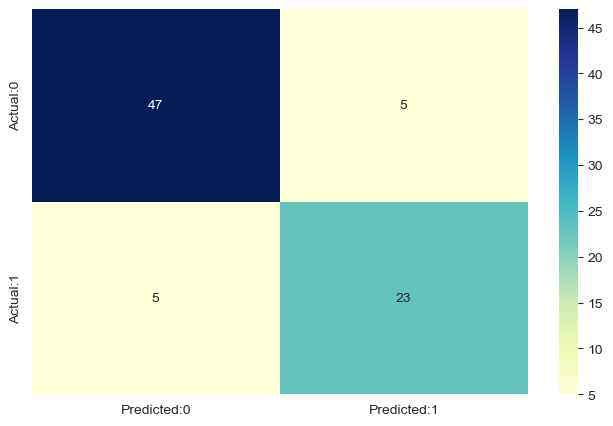

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");
# The confusion_matrix function takes two arguments: y_test and y_pred. y_test contains the true labels of the test data, 
# while y_pred contains the predicted labels generated by a classification model.

In [42]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
# The four components of the confusion matrix (true negatives, true positives, false negatives, and false positives)
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
# calculates the sensitivity (also known as recall or true positive rate) and specificity of the model. 
# Sensitivity measures the proportion of actual positives that are correctly identified as positive by the model, 
# while specificity measures the proportion of actual negatives that are correctly identified as negative.

In [43]:
print(cm)
print('true negatives (TN): Both, actual and predicted values are false: ', TN)
print('true positives (TP): Both, actual and predicted values are true: ', TP)
print('false positives (FP): Predicted value is yes but actual is false: ', FN)
print('false negative (FN): Predicted value is no but actual is true: ', FP)
# The confusion matrix shows that there are a total of 80 test samples, out of which 47 are correctly classified as negative (true negatives), 
# 23 are correctly classified as positive (true positives), 5 are incorrectly classified as positive when they are actually negative (false positives), 
# and 5 are incorrectly classified as negative when they are actually positive (false negatives).
# The true positives and true negatives represent the number of correct classifications, while the false positives 
# and false negatives represent the number of incorrect classifications. These values can be used to calculate various performance 
# metrics such as accuracy, precision, recall, and F1 score.
# In this case, the model has a high number of true positives and true negatives, indicating good overall performance. 
# The false positives and false negatives are relatively low, which means the model makes relatively few mistakes.

[[47  5]
 [ 5 23]]
true negatives (TN): Both, actual and predicted values are false:  47
true positives (TP): Both, actual and predicted values are true:  23
false positives (FP): Predicted value is yes but actual is false:  5
false negative (FN): Predicted value is no but actual is true:  5


In [44]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Misclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.875 
 The Misclassification = 1-Accuracy =                   0.125 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.8214285714285714 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9038461538461539 
 Positive Predictive value = TP/(TP+FP) =                0.8214285714285714 
 Negative predictive Value = TN/(TN+FN) =                0.9038461538461539 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  8.542857142857143 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.1975683890577508


-> The accuracy of the model is 0.875, which means that 87.5% of the test set instances were classified correctly by the model. The misclassification rate is 0.125, which means that 12.5% of the instances were classified incorrectly.

-> The sensitivity (true positive rate) of the model is 0.821, which means that 82.1% of the actual positive instances were correctly classified as positive by the model. The specificity (true negative rate) of the model is 0.903, which means that 90.3% of the actual negative instances were correctly classified as negative by the model.

-> The positive predictive value of the model is 0.821, which means that when the model predicts a positive instance, it is correct 82.1% of the time. The negative predictive value of the model is 0.903, which means that when the model predicts a negative instance, it is correct 90.3% of the time.

-> The positive likelihood ratio of the model is 8.54, which means that the odds of a positive instance being correctly classified by the model are 8.54 times higher than the odds of a positive instance being incorrectly classified by the model. The negative likelihood ratio of the model is 0.20, which means that the odds of a negative instance being correctly classified by the model are 0.20 times the odds of a negative instance being incorrectly classified by the model.